<a href="https://colab.research.google.com/github/ahmed-hesham1221/CV-Project-QR-/blob/main/CV_Shgall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install --upgrade reedsolo
import reedsolo as rs
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
def process_image(image, start_row, end_row, start_col, end_col):
    # Apply average filter
    avg_filtered_img = cv2.blur(image, (5, 5))
    # Debugging output to confirm ROI bounds
    print(f"ROI bounds - Rows: {start_row} to {end_row}, Columns: {start_col} to {end_col}")
    # Define the region of interest based on the specified bounds
    roi = avg_filtered_img[start_row:end_row, start_col:end_col]
    # Resize the ROI to 21x21 pixels
    resized_roi = cv2.resize(roi, (21, 21))
    # Convert the resized ROI to binary black and white using thresholding
    _, binary_roi = cv2.threshold(resized_roi, 200, 255, cv2.THRESH_BINARY)
    return binary_roi

folder_path = '/content/drive/MyDrive/CV_Project/Test_Cases'
file_list = sorted(os.listdir(folder_path))
images = []
for filename in file_list:
    if filename.endswith(".png") or filename.endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path , cv2.IMREAD_GRAYSCALE )
        if img is not None:
            images.append(img)


T1👌

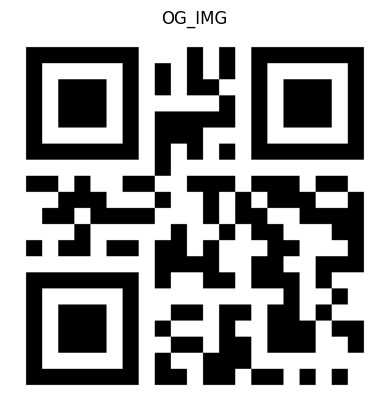

In [6]:

img = images[0]
plt.imshow(img, cmap='gray')
plt.title('OG_IMG')
plt.axis('off')
plt.show()


T2 🤷🏻‍♂️

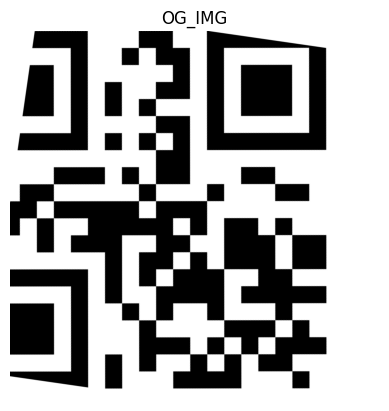

In [10]:
img=images[1]

# Threshold the image to get a binary image
_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and find the largest contour (the QR code)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

qr_corners = None  # Initialize qr_corners

for contour in contours:
    # Approximate the contour to get the four corners of the QR code
    for epsilon in np.arange(0.01, 0.2, 0.01):  # Try different epsilon values
        approx = cv2.approxPolyDP(contour, epsilon * cv2.arcLength(contour, True), True)
        if len(approx) == 4:
            qr_corners = approx
            break
    if qr_corners is not None:
        break

# Check if qr_corners is found
if qr_corners is not None:
    angle = 8.2  # Angle to rotate

    # Get the center of the QR code
    center = (img.shape[1] // 2, img.shape[0] // 2)

    # Perform the rotation
    rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)

    # Apply the rotation to the original image
    rotated_image = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]), borderValue=(255, 255, 255))

    # Convert images to RGB for Matplotlib
    original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rotated_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)


    plt.imshow(rotated_rgb, cmap='gray')
    plt.title('OG_IMG')
    plt.axis('off')
    plt.show()

else:
    print("No QR Code detected.")

BLACK-MIRROR: okkkk

T3👌

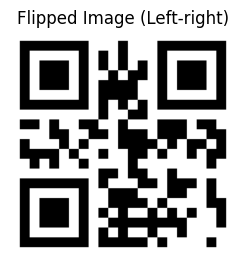

In [11]:
img=images[2]
# Flip the image vertically (upside down)
flipped_vertically = cv2.flip(img, 0)

# Flip the image horizontally
flipped_both = cv2.flip(flipped_vertically, 1)


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image (Left-right)')
plt.axis('off')

plt.show()

T4👌

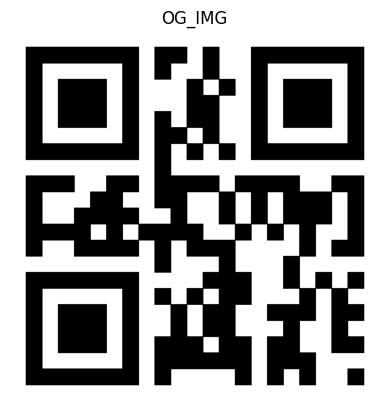

In [12]:

img=images[3]
# Flip the image Horizontally
gray = cv2.flip(img, 1)
threshold = 0
# Create a mask for gray pixels
mask = gray <= threshold
# Set gray pixels to white
gray[mask] = 255

kernel = np.ones((5,5), np.uint8)
dilated_image = cv2.dilate(gray, kernel, iterations=3)
eroded_image = cv2.erode(dilated_image, kernel, iterations=3)
enhanced_image = cv2.convertScaleAbs(eroded_image)


img= enhanced_image
plt.imshow(img, cmap='gray')
plt.title('OG_IMG')
plt.axis('off')
plt.show()


T5🤷🏻‍♂️

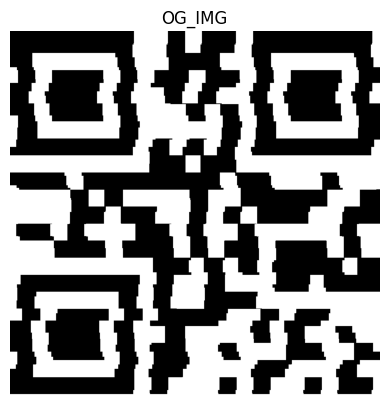

In [14]:
def remove_haze(hazy_image, kernel_size=(7, 7), iterations=5):
    # Convert image to grayscale
    # hazy_gray = cv2.cvtColor(hazy_image, cv2.COLOR_BGR2GRAY)

    # Binarize the image (convert to black and white)
    _, binary = cv2.threshold(hazy_image, 128, 255, cv2.THRESH_BINARY)

    # Define a kernel for morphological operations
    kernel = np.ones(kernel_size, np.uint8)

    # Perform morphological erosion followed by dilation

    eroded = cv2.erode(binary, kernel, iterations=iterations)

    aligned = cv2.dilate(eroded, kernel, iterations=iterations)

    # Convert the aligned image back to BGR for visualization
    aligned_bgr = cv2.cvtColor(aligned, cv2.COLOR_GRAY2BGR)

    return aligned_bgr



img=images[4]
img= remove_haze(img)
plt.imshow(img, cmap='gray')
plt.title('OG_IMG')
plt.axis('off')
plt.show()



T6🤷🏻‍♂️

In [ ]:
# img=images[5]
# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Threshold the image to get a binary image
# _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# # Find contours
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Sort contours by area and find the largest contour (the QR code)
# contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

# qr_corners = None  # Initialize qr_corners

# for contour in contours:
#     # Approximate the contour to get the four corners of the QR code
#     for epsilon in np.arange(0.01, 0.2, 0.01):  # Try different epsilon values
#         approx = cv2.approxPolyDP(contour, epsilon * cv2.arcLength(contour, True), True)
#         if len(approx) == 4:
#             qr_corners = approx
#             break
#     if qr_corners is not None:
#         break

# # Check if qr_corners is found
# if qr_corners is not None:
#     angle = 8  # Angle to rotate

#     # Get the center of the QR code
#     center = (image.shape[1] // 2, image.shape[0] // 2)

#     # Perform the rotation
#     rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)

#     # Apply the rotation to the original image
#     rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), borderValue=(255, 255, 255))

#     # Convert images to RGB for Matplotlib
#     original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     rotated_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

#     # Display the original and rotated images using plt.show()
#     plt.figure(figsize=(10, 5))
#     plt.subplot(121)
#     plt.imshow(original_rgb)
#     plt.title('Original Image')
#     plt.axis('off')

#     plt.subplot(122)
#     plt.imshow(rotated_rgb)
#     plt.title(f'Rotated Image ')
#     plt.axis('off')

#     plt.show()
# else:
#     print("No QR Code detected.")

T7 🤷🏻‍♂️



Images loaded successfully.
50 962 50 962


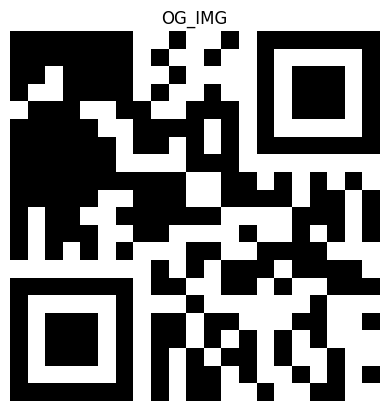

In [21]:

img=images[6]
if img is None:
    print("Error: Unable to read images.")
else:
    print("Images loaded successfully.")
    # def detect_finger(image):
    #     # Convert image to HSV color space
    #     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #     # Define lower and upper bounds for finger color in HSV
    #     lower_finger = np.array([0, 1, 0], dtype=np.uint8)
    #     upper_finger = np.array([255, 255, 255], dtype=np.uint8)

    #     # Threshold the HSV image to get a binary mask of the finger region
    #     finger_mask = cv2.inRange(hsv, lower_finger, upper_finger)

    #     # Optional: Apply morphology operations to refine the mask (e.g., remove noise)
    #     kernel = np.ones((5, 5), np.uint8)
    #     finger_mask = cv2.morphologyEx(finger_mask, cv2.MORPH_OPEN, kernel)
    #     finger_mask = cv2.morphologyEx(finger_mask, cv2.MORPH_CLOSE, kernel)

    #     return finger_mask

    # finger_mask = detect_finger(img)
    # # Inpainting
    # inpainted_image = cv2.inpaint(img, finger_mask, inpaintRadius=2, flags=cv2.INPAINT_TELEA)

    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(img, erosion_kernel, iterations=1)
    # Apply average filter
    avg_filtered_img = cv2.blur(eroded_img, (5, 5))
    start_row = 50
    end_row = 962
    start_col = 50
    end_col = 962
    print(start_row, end_row, start_col, end_col)
    # Define the region of interest
    roi = avg_filtered_img[start_row:end_row, start_col:end_col]
    # Resize the ROI to 21x21 pixels
    resized_roi = cv2.resize(roi, (21, 21))
    # Convert the resized ROI to binary black and white using thresholding
    _, binary_roi = cv2.threshold(resized_roi, 200, 255, cv2.THRESH_BINARY)
    _, img = cv2.threshold(binary_roi, 142, 255, cv2.THRESH_BINARY)
    plt.imshow(img, cmap='gray')
    plt.title('OG_IMG')
    plt.axis('off')
    plt.show()


T8👌

Images loaded successfully.
ROI bounds - Rows: 50 to 967, Columns: 50 to 967


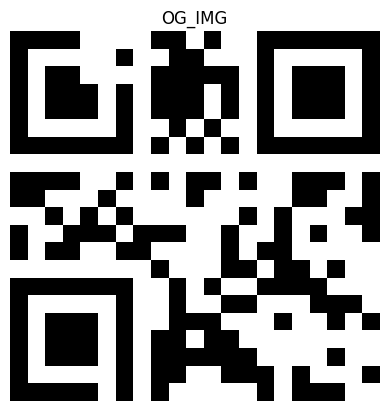

In [28]:
img=images[7]
if img is None:
    print("Error: Unable to read images.")
else:
    print("Images loaded successfully.")

    # Check the image data type
    if img.dtype != np.uint8:
    # Convert the image to 8-bit grayscale
       img = cv2.convertScaleAbs(img)

    equalized_image = cv2.equalizeHist(img)
    # Apply binary thresholding
    threshold_value = 150
    binary_image = np.array(cv2.threshold(equalized_image, 254, 255, cv2.THRESH_BINARY)[1], dtype="uint8")
    # Apply median filtering with a kernel size of 3x3 (you can adjust the kernel size)
    kernel_size = 7
    median_filtered = cv2.medianBlur(binary_image, kernel_size)
    # Optional: Apply morphological operations (e.g., closing) to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    square_size = 12
    # Define the kernel for dilation
    dilation_kernel = np.ones((square_size, square_size), np.uint8)
    # Apply morphological dilation to make the black squares more square-shaped
    dilated_img = cv2.dilate(equalized_image, dilation_kernel, iterations=1)
    # Apply erosion with a 15x15 pixel square filter
    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)

    binary_roi=process_image(eroded_img,50,967,50,967)


    img= binary_roi
    plt.imshow(img, cmap='gray')
    plt.title('OG_IMG')
    plt.axis('off')
    plt.show()





T9🤷🏻‍♂️

Images loaded successfully.


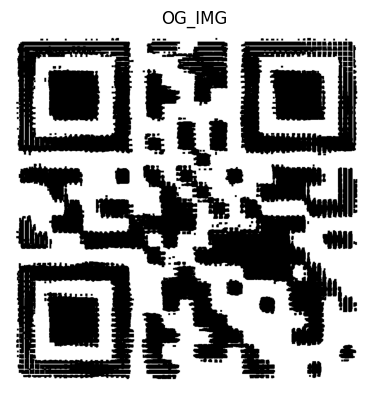

In [19]:
img=images[8]
if img is None:
    print("Error: Unable to read images.")
else:
    print("Images loaded successfully.")

def motion_kernel(angle, length):
    """Creates a motion blur kernel."""
    kernel = np.zeros((length, length))
    kernel[int((length - 1) / 2), :] = np.ones(length)
    M = cv2.getRotationMatrix2D((length // 2, length // 2), angle, 1)
    kernel = cv2.warpAffine(kernel, M, (length, length))
    kernel /= np.sum(kernel)
    return kernel

def wiener_deconvolution(image, psf, noise_var):
    """Performs Wiener deconvolution."""
    image_dft = np.fft.fft2(image)
    psf_dft = np.fft.fft2(psf, s=image.shape)
    psf_dft_conj = np.conj(psf_dft)
    psf_dft_mag_squared = np.abs(psf_dft) ** 2
    wiener_filter = psf_dft_conj / (psf_dft_mag_squared + noise_var)
    restored_dft = image_dft * wiener_filter
    restored_image = np.fft.ifft2(restored_dft)
    return np.abs(restored_image)

# Define the angle and length of the motion blur
angle = 315  # Adjust the angle as needed (in degrees)
length = 20  # Adjust the length of the motion blur as needed

# Create the motion blur kernel
psf = motion_kernel(angle, length)

# Define the noise variance (adjust as needed)
noise_variance = 1e-4

# Perform Wiener deconvolution
restored_image = wiener_deconvolution(img, psf, noise_variance)

# Convert the image to an 8-bit unsigned integer depth
restored_image = cv2.convertScaleAbs(restored_image)

image_rgb = cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB)

# Convert the image to float32 data type
image_float = np.float32(image_rgb)

# Adjust the brightness by adding the brightness factor
brightened_image = image_float + 30

# Clip the pixel values to the range [0, 255]
brightened_image = np.clip(brightened_image, 0, 255)

# Convert the image back to uint8 data type
brightened_image = np.uint8(brightened_image)


# Apply a threshold to the gradient image to create a binary image
threshold_value = 150
binary_image = np.array(cv2.threshold(brightened_image, threshold_value, 255, cv2.THRESH_BINARY)[1], dtype="uint8")

# Optional: Apply morphological operations (e.g., closing) to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

kernel_size2 = (7,7)  # You can adjust the kernel size as needed
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size2)
eroded_image = cv2.erode(closed_image,kernel2, iterations=1)


kernel_size3 = (1,1)  # You can adjust the kernel size as needed
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size3)
dilated_image = cv2.dilate(closed_image,kernel3, iterations=1)

# # Apply a Gaussian blur to further reduce noise and enhance edges
# gaussian_filtered_image = cv2.GaussianBlur(dilated_image, (7,7), 0)
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpen = cv2.filter2D(gaussian_filtered_image, -1, sharpen_kernel)
# # Apply dilation
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# imageDilated = cv2.dilate(sharpen, kernel)
# # # Apply erosion
# imageEroded = cv2.erode(imageDilated, kernel)
# avg_filtered_img = cv2.blur(imageEroded, (5, 5))
# start_row = 80
# end_row = 969
# start_col = 80
# end_col = 969
# print(start_row, end_row, start_col, end_col)
# # Define the region of interest
# roi = avg_filtered_img[start_row:end_row, start_col:end_col]

# resized_image = cv2.resize(roi, (21, 21))
# _, img = cv2.threshold(resized_image, 128, 255, cv2.THRESH_BINARY)

# print(img.shape


# Display the resulting image
plt.imshow(dilated_image, cmap='gray')
plt.title('OG_IMG')
plt.axis('off')
plt.show()

T10👌

Images loaded successfully.
ROI bounds - Rows: 50 to 967, Columns: 50 to 967


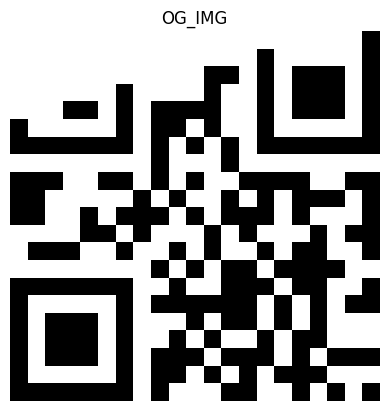

In [29]:
img=images[9]
if img is None:
    print("Error: Unable to read images.")
else:
    print("Images loaded successfully.")

    # Check the image data type
    if img.dtype != np.uint8:
    # Convert the image to 8-bit grayscale
       img = cv2.convertScaleAbs(img)

    equalized_image = cv2.equalizeHist(img)
    # Apply binary thresholding
    threshold_value = 150
    binary_image = np.array(cv2.threshold(equalized_image, 254, 255, cv2.THRESH_BINARY)[1], dtype="uint8")
    # Apply median filtering with a kernel size of 3x3 (you can adjust the kernel size)
    kernel_size = 7
    median_filtered = cv2.medianBlur(binary_image, kernel_size)
    # Optional: Apply morphological operations (e.g., closing) to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    square_size = 12
    # Define the kernel for dilation
    dilation_kernel = np.ones((square_size, square_size), np.uint8)
    # Apply morphological dilation to make the black squares more square-shaped
    dilated_img = cv2.dilate(equalized_image, dilation_kernel, iterations=1)
    # Apply erosion with a 15x15 pixel square filter
    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)

    binary_roi=process_image(eroded_img,50,967,50,967)


    img= binary_roi
    plt.imshow(img, cmap='gray')
    plt.title('OG_IMG')
    plt.axis('off')
    plt.show()






T11👌

<ipython-input-52-c0fb7d45e848>:14: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt((i - rows/2)*2 + (j - cols/2)*2)


Size of cropped image: (932, 932)


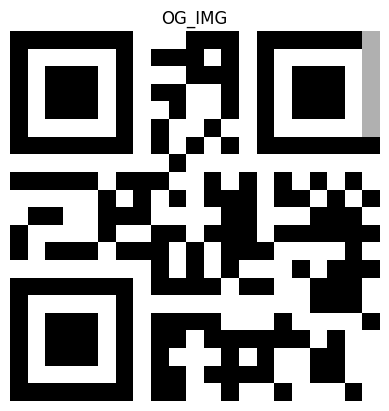

In [52]:
def remove_sin_gradient(img):
  # Apply Fourier Transform
  f_transform = np.fft.fft2(img)
  f_transform_shifted = np.fft.fftshift(f_transform)
  # Identify the frequency corresponding to the sinusoidal noise
  frequency = (11 / img.shape[1])*1.5  # Assuming the noise has 11 complete cycles

  # Create a filter mask
  filter_mask = np.ones_like(f_transform_shifted)
  rows, cols = filter_mask.shape
  for i in range(rows):
      for j in range(cols):
          # Calculate the distance from the center
           dist = np.sqrt((i - rows/2)*2 + (j - cols/2)*2)
           # If the frequency is within a certain range, set the mask value to 0
           if abs(dist - frequency * rows) < 1:  # Adjust the range as needed
              filter_mask[i, j] = 0

    # Apply the filter mask
  filtered_transform = f_transform_shifted * filter_mask

   # Perform inverse Fourier Transform
  filtered_img = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_transform)))

    # Apply thresholding
  _, thresh_img = cv2.threshold(filtered_img, 89, 255, cv2.THRESH_BINARY)

    # Perform dilation operation
  dilation_size = 1  # Change this value as needed
  kernel_dilation = np.ones((dilation_size, dilation_size), np.uint8)
  dilated_img = cv2.dilate(thresh_img, kernel_dilation, iterations=1)

    # Define the size of the rectangle for erosion
  erosion_height = 32
  erosion_width = 32

    # Create a kernel for erosion
  kernel_erosion = np.ones((erosion_height, erosion_width), np.uint8)

    # Perform erosion operation
  eroded_img = cv2.erode(dilated_img, kernel_erosion, iterations=1)


    # Define cropping dimensions
  top_crop = 40
  bottom_crop = 40
  left_crop = 40
  right_crop = 40

    # Perform cropping
  cropped_img = eroded_img[top_crop:-bottom_crop, left_crop:-right_crop]

  print("Size of cropped image:", cropped_img.shape)

    # Resize the ROI to 21x21 pixels
  roi_resized = cv2.resize(cropped_img, (21, 21))

  return cv2.convertScaleAbs(roi_resized)



img1=remove_sin_gradient(images[10])
plt.imshow(img1, cmap='gray')
plt.title('OG_IMG')
plt.axis('off')
plt.show()

T12👌

Image size: (1012, 1012)
ROI bounds - Rows: 50 to 962, Columns: 50 to 962


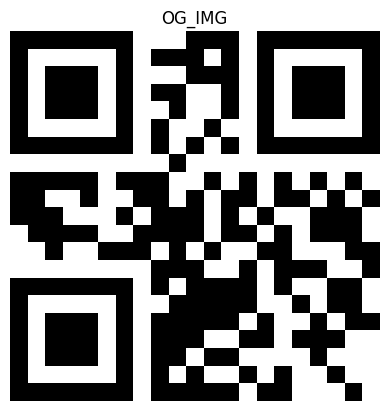

In [31]:
img=images[11]

if img is not None:
   # Output the size of the image
    print("Image size:", img.shape)

    # Apply mean filter twice
    filtered_img = cv2.blur(img, (9, 9))
    filtered_img = cv2.blur(filtered_img, (9, 9))

    # Define the size of the larger filter
    filter_size = 9
    # Apply the larger filter to perform additional averaging
    filtered_img = cv2.blur(filtered_img, (filter_size, filter_size))
    # Apply thresholding to further remove noise or enhance edges
    _, thresh_img = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Apply morphological opening to further refine the image
    kernel = np.ones((3, 3), np.uint8)
    opening_img = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel)


    # Define the size of the square for dilation
    square_size = 12

    # Define the kernel for dilation
    dilation_kernel = np.ones((square_size, square_size), np.uint8)

    # Apply morphological dilation to make the black squares more square-shaped
    dilated_img = cv2.dilate(opening_img, dilation_kernel, iterations=1)

    # Apply erosion with a 15x15 pixel square filter
    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)

    binary_roi=process_image(eroded_img , 50 ,962,50,962)

    img= binary_roi
    plt.imshow(img, cmap='gray')
    plt.title('OG_IMG')
    plt.axis('off')
    plt.show()


T13🤷🏻‍♂️

ROI bounds - Rows: 50 to 967, Columns: 50 to 967


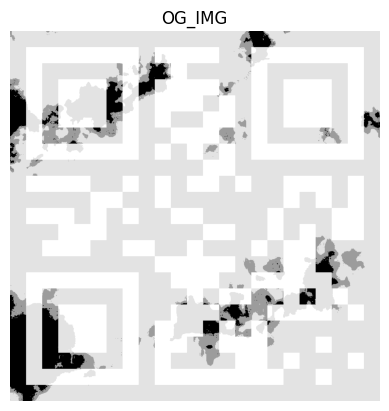

In [48]:
def remove_black_areas(image, threshold=90, off_white_threshold=2):
    if len(image.shape) == 3:  # If image has three channels
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Threshold to identify black areas
    _, thresholded = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    # Invert the thresholded image to get black areas as white
    thresholded = cv2.bitwise_not(thresholded)

    # Apply bitwise AND to keep black regions
    result = cv2.bitwise_and(image, image, mask=thresholded)
    # Invert result to keep non-black regions
    result = cv2.bitwise_not(result)

     # Check the image data type
    if result.dtype != np.uint8:
    # Convert the image to 8-bit grayscale
       result = cv2.convertScaleAbs(result)

    equalized_image = cv2.equalizeHist(result)
    # Apply binary thresholding
    threshold_value = 150
    binary_image = np.array(cv2.threshold(equalized_image, 254, 255, cv2.THRESH_BINARY)[1], dtype="uint8")
    # Apply median filtering with a kernel size of 3x3 (you can adjust the kernel size)
    kernel_size = 7
    median_filtered = cv2.medianBlur(binary_image, kernel_size)
    # Optional: Apply morphological operations (e.g., closing) to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    square_size = 12
    # Define the kernel for dilation
    dilation_kernel = np.ones((square_size, square_size), np.uint8)
    # Apply morphological dilation to make the black squares more square-shaped
    dilated_img = cv2.dilate(equalized_image, dilation_kernel, iterations=1)
    # Apply erosion with a 15x15 pixel square filter
    erosion_kernel = np.ones((15, 15), np.uint8)
    eroded_img = cv2.erode(dilated_img, erosion_kernel, iterations=1)

    binary_roi=process_image(eroded_img,50,967,50,967)

    threshold = 0
    # Create a mask for gray pixels
    mask = binary_roi <= threshold
    # Set gray pixels to white
    binary_roi[mask] = 255

    kernel = np.ones((5,5), np.uint8)
    dilated_image = cv2.dilate(binary_roi, kernel, iterations=3)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=3)
    enhanced_image = cv2.convertScaleAbs(eroded_image)


    # if len(enhanced_image.shape) == 3:  # If image has three channels
    #     # Create a mask for off-white areas
    #     enhanced_image = cv2.inRange(gray, off_white_threshold, 255)
    #     # Set off-white areas to white (255) in the result image
    #     enhanced_image[off_white_mask != 0] = [255, 255, 255]
    #     # Set all other colors to black (0) in the result image
    #     enhanced_image[off_white_mask == 0] = [0, 0, 0]




    return result

img=remove_black_areas(images[12])
plt.imshow(img, cmap='gray')
plt.title('OG_IMG')
plt.axis('off')
plt.show()



Found 0 potential locator squares.


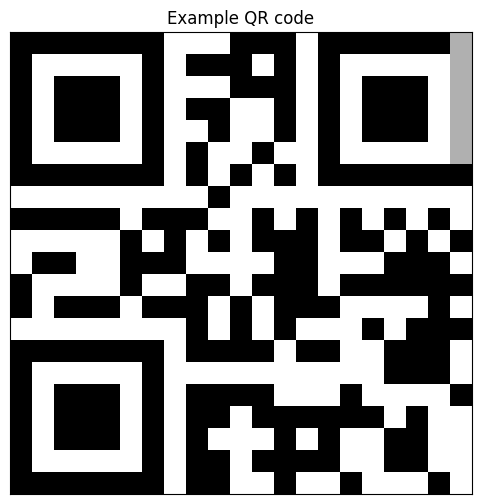

In [58]:

def find_qr_locator_squares(image):
    if image.ndim == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image


    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if hierarchy is None:
        return []

    hierarchy = hierarchy[0]
    locator_squares = []

    for idx, contour in enumerate(contours):
        if hierarchy[idx][3] == -1:  # Check if the contour has no parent
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

            if len(approx) == 4:  # Contour has 4 vertices, potentially a square
                (x, y, w, h) = cv2.boundingRect(approx)
                aspect_ratio = w / float(h)
                if 0.9 <= aspect_ratio <= 1.1:  # Aspect ratio check for squareness
                    if 200 < w < 1000:  # Size check (adjust based on your specific requirements)
                        child_idx = hierarchy[idx][2]
                        if child_idx != -1 and hierarchy[child_idx][2] != -1:  # Check that it has a child which also has a child
                            locator_squares.append(approx)

    return locator_squares


# Assuming 'img' is already loaded and is the image to be processed
locator_squares = find_qr_locator_squares(img)
print("Found {} potential locator squares.".format(len(locator_squares)))

for square in locator_squares:
    cv2.drawContours(img, [square], -1, (0, 255, 0), 2)



fig = plt.figure(figsize=(6, 6));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code')
plt.imshow(img1, cmap='gray');


No locator squares found


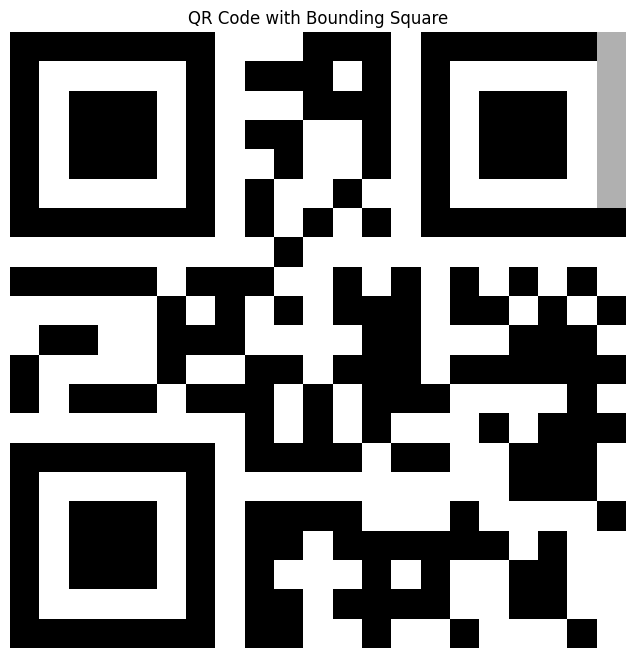

In [56]:
def draw_bounding_square(image, locator_squares):
  if not locator_squares:
      print("No locator squares found")
      return image

  # Initialize min/max coordinates with values from the first square
  min_x, min_y = np.inf, np.inf
  max_x, max_y = -np.inf, -np.inf

  # Loop through each square to find the extreme coordinates
  for square in locator_squares:
      x, y, w, h = cv2.boundingRect(square)
      min_x = min(min_x, x)
      min_y = min(min_y, y)
      max_x = max(max_x, x + w)
      max_y = max(max_y, y + h)

  # Draw the bounding rectangle
  cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2)
  return image

# Assuming 'img' and 'locator_squares' are already defined
# img should be loaded via cv2.imread() or similar
# locator_squares should be populated by find_qr_locator_squares(img) or similar
locator_squares = find_qr_locator_squares(img1)  # Make sure you've defined and called this correctly
bounded_img = draw_bounding_square(img1, locator_squares)

# Display the result
fig = plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(bounded_img, cv2.COLOR_BGR2RGB))
plt.title('QR Code with Bounding Square')
plt.axis('off')
plt.show()

In [59]:
def find_non_white_bounds(image):
    def find_bounds(data, reverse=False):
        for idx, line in enumerate(data if not reverse else data[::-1]):
            if np.any(line != 255):  # Assuming white is the quiet zone color
                return len(data) - idx if reverse else idx
        return -1
    # Find row bounds
    start_row = find_bounds(image)
    end_row = find_bounds(image, reverse=True)
    # Find column bounds
    transposed = cv2.transpose(image)
    start_col = find_bounds(transposed)
    end_col = find_bounds(transposed, reverse=True)
    return start_row, end_row, start_col, end_col



def estimate_module_size(image):
    # Analyze specifically the top-left finder pattern
    height, width = image.shape
    finder_pattern_area = image[:height//5, :width//5]  # Roughly the top-left corner

    transitions = []
    for line in finder_pattern_area:
        # Detect changes from white to black and vice versa
        line_transitions = np.where(np.diff(line) != 0)[0]
        if line_transitions.size > 0:
            transitions.extend(np.diff(line_transitions))  # Distances between transitions

    if transitions:
        estimated_module_size = np.median(transitions)  # Median transition distance
        return max(1, int(estimated_module_size))  # Ensure at least 1
    return 1  # Fallback if no transitions found

# def analyze_qr_structure(image):
#     start_row, end_row, start_col, end_col = find_non_white_bounds(image)
#     qr_no_quiet_zone = image[start_row:end_row, start_col:end_col]
#     plt.imshow(qr_no_quiet_zone, cmap='gray')
#     plt.title('QR Code Without Quiet Zone')
#     plt.show()

#     module_size = estimate_module_size(qr_no_quiet_zone)
#     if module_size == 0:
#         print("Module size computed as zero, which is not feasible.")
#         return

#     grid_cells_num = qr_no_quiet_zone.shape[0] // module_size
#     print('Module Size:', module_size)
#     print('Number of Grid Cells:', grid_cells_num)


def analyze_qr_structure(image):
    start_row, end_row, start_col, end_col = find_non_white_bounds(image)
    qr_no_quiet_zone = image[start_row:end_row, start_col:end_col]

    module_size = estimate_module_size(qr_no_quiet_zone)
    if module_size <= 0:
        print("Module size computed as zero or negative, which is not feasible.")
        return

    # Ensure dimensions are exactly divisible by module_size
    height, width = qr_no_quiet_zone.shape
    grid_cells_num = min(height, width) // module_size
    qr_no_quiet_zone = qr_no_quiet_zone[:grid_cells_num * module_size, :grid_cells_num * module_size]

    # Reshape the image to visualize individual QR code cells
    qr_cells = qr_no_quiet_zone.reshape(
        (grid_cells_num, module_size, grid_cells_num, module_size)
    ).swapaxes(1, 2)


    # Set up the figure for displaying each grid cell
    _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
            col.axis('off')  # Hide both axes
            col.spines[:].set_color('red')
            col.spines[:].set_linewidth(40)
    plt.show()


    qr_cells_numeric = np.zeros((grid_cells_num, grid_cells_num), dtype=np.uint8)
    for i in range(grid_cells_num):
        for j in range(grid_cells_num):
            cell = qr_cells[i, j]
            qr_cells_numeric[i, j] = 1 if np.median(cell) > 127 else 0

    print(qr_cells_numeric)


    qr_cells_numeric[8]
    ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
    print(ecl)

    MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
    }

    # Same row as above, the three cells after the ecl cells (converted to a string)
    mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
    mask_str = ''.join([str(c) for c in mask])
    print(mask_str)

    fec = []
    fec.append(qr_cells_numeric[8, 5])
    fec.append(qr_cells_numeric[8, 7])
    fec.extend(qr_cells_numeric[0:6, 8])
    fec.extend(qr_cells_numeric[7:9, 8])
    fec = [int(not(c)) for c in fec]
    print(fec)

    print(ecl, mask, fec)

    _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
    for i, row in enumerate(axes):
      for j, col in enumerate(row):

          col.get_xaxis().set_visible(False)
          col.get_yaxis().set_visible(False)
          if (i == 8 and j <= 8) or (i <= 8 and j == 8):
              if (i != 6) and (j != 6):
                  col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
                  col.spines[:].set_color('red')
                  continue
          col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

      ecl[0] ^= 1
      mask[0] ^= 1
      mask[2] ^= 1
      fec[5] ^= 1
      fec[8] ^= 1

      # And now we print...
      print(ecl, mask, fec)



          # Before we proceed, let's write a function for masking to make our lives easier
    UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"

    def apply_mask(data_start_i, data_start_j, direction):
        '''
        data_start_i/j represent the first cell's coords in its respective direction
        direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
        '''
        result = []
        row_offsets = []
        col_offsets = []
        if (direction in [UP, UP_ENC]):
            row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
            col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
        if (direction == DOWN):
            row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
            col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
        if (direction == CW):
            row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
            col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
        if (direction == CCW):
            row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
            col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

        for i, j in zip(row_offsets, col_offsets):
            cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
            result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

        return result[:4] if direction == UP_ENC else result

    enc_bits = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
    enc_int = int(''.join([str(bit) for bit in enc_bits]), 2)
    print(f'{enc_bits} = Byte encoding (8 bits per character)')
    # 0001	Numeric encoding (10 bits per 3 digits)
    # 0010	Alphanumeric encoding (11 bits per 2 characters)
    # 0100	Byte encoding (8 bits per character)
    # 1000	Kanji encoding (13 bits per character)

    len_bits = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
    len_int = int(''.join([str(bit) for bit in len_bits]), 2)
    print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')


    data_starting_indices = [
    [grid_cells_num-7,  grid_cells_num-1,  UP],    #    w    /     H
    [grid_cells_num-11, grid_cells_num-1,  CCW],   #    w    /     e
    [grid_cells_num-10, grid_cells_num-3,  DOWN],  #    w    /     l
    [grid_cells_num-6,  grid_cells_num-3,  DOWN],  #    .    /     l
    [grid_cells_num-2,  grid_cells_num-3,  CW],    #    w    /     o
    [grid_cells_num-3,  grid_cells_num-5,  UP],    #    i    /     ,
    [grid_cells_num-7,  grid_cells_num-5,  UP],    #    k    /  (space)
    [grid_cells_num-11, grid_cells_num-5,  CCW],   #    i    /     Q
    [grid_cells_num-10, grid_cells_num-7,  DOWN],  #    p    /     R
    [grid_cells_num-6,  grid_cells_num-7,  DOWN],  #    e    /  (space)
    [grid_cells_num-2,  grid_cells_num-7,  CW],    #    d    /     W
    [grid_cells_num-3,  grid_cells_num-9,  UP],    #    i    /     o
    [grid_cells_num-7,  grid_cells_num-9,  UP],    #    a    /     r
    [grid_cells_num-11, grid_cells_num-9,  UP],    #    .    /     l
    [grid_cells_num-16, grid_cells_num-9,  UP],    #    o    /     d
    [grid_cells_num-20, grid_cells_num-9,  CCW],   #    r    /     !
    [grid_cells_num-19, grid_cells_num-11, DOWN],  #    g    /     1
    [grid_cells_num-14, grid_cells_num-11, DOWN],  # End of message (Terminator)
    [grid_cells_num-12, grid_cells_num-11, DOWN],  # E1
    [grid_cells_num-8,  grid_cells_num-11, DOWN],  # E2
    [grid_cells_num-4,  grid_cells_num-11, DOWN],  # E3
    [grid_cells_num-9,  grid_cells_num-13, UP],    # E4
    [grid_cells_num-12, grid_cells_num-16, DOWN],  # E5
    [grid_cells_num-9,  grid_cells_num-18, UP],    # E6
    [grid_cells_num-12, grid_cells_num-20, DOWN],  # E7
    ]

    message_bits = []
    message_bits.extend(enc_bits)
    message_bits.extend(len_bits)
    extracted_data_no_error_correction = ''
    for a, b, d in data_starting_indices:  # For each starting index and direction
        bits = apply_mask(a, b, d)  # Extract the bits per the indexed QR code symbol
        bit_string = ''.join([str(bit) for bit in bits])  # Convert to string of bits
        alpha_char = chr(int(bit_string, 2))  # Convert binary to int, then to a char
        if bit_string[:4] == "0000":  # If the first 4 bits are 0s, this is the END
            print(f'{bit_string[:4]}...         = NULL TERMINATOR (END Symbol, SKIP!)')
            message_bits.extend(bits[:4])  # Append only the four bits
        else:  # If not the END symbol, append full set of bits
            message_bits.extend(bits)
            extracted_data_no_error_correction += alpha_char
        print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')

    print(f'\ni.e., the data and ECCs in the QR code as-is are "{extracted_data_no_error_correction}"')

    # For every 8 bits in the extracted message, convert to a byte
    message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

    # Create the Reed-Solomon Codec for 7 ECC symbols
    rsc = rs.RSCodec(nsym=7)

    # Decode the bytes with the 7-ECC RS Codec
    message_decoded = rsc.decode(message_bytes)
    print('\nNow decoding...\n')
    rsc.maxerrata(verbose=True)
    print(f'Decoded message = "{message_decoded[0].decode(encoding="iso-8859-1")}"')
    print(f'Decoded ECCs    = "{message_decoded[1][-7:].decode(encoding="iso-8859-1")}"')

    # In order to extract the actual data, need to convert back to bits and...
    # ...remove the initial 12 bits (enc and len) and last 4 bits (terminator)
    data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:-4]

    # Now convert back to bytes and print it lol
    data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
    print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')

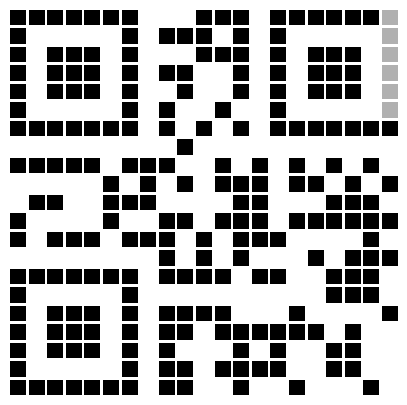

[[0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1]
 [0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1]
 [0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1]
 [0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1]
 [0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1]
 [0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1]
 [0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1]]
[1, 1]
111
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 1] [1, 1

ReedSolomonError: Too many errors to correct

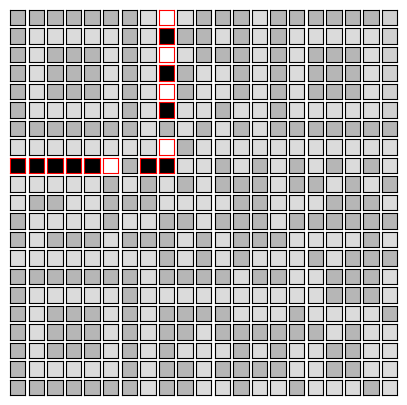

In [61]:
start_row, end_row, start_col, end_col = find_non_white_bounds(img1)
analyze_qr_structure(img1)